In [ ]:
#!pip install statsmodels
#!pip install tabulate

### Import the necessary libraries

In [3]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

In [4]:
def pi(x):
    return np.e**(-abs(x[0]) - abs(x[1]) - abs(x[0]-x[1]))

### Random-Walk Metropolis

In [5]:
# define the proposal distribution
def q1(x):
    '''
    Random proposition for the Metropolis-Hastings algorithm.
    Uses the normal distribution.

    x -- np array of size k
    '''
    return np.random.normal(x, scale = 2)

In [6]:
# define the proposal distribution
def q2(x):
    '''
    Random proposition for the Metropolis-Hastings algorithm.
    Uses the uniform distribution.

    x -- np array of size k
    '''
    return np.random.uniform(x-0.005, x+0.005)

In [7]:
def q_uniform(a, b):

    pdf = 1 / (b - a)
    return pdf

In [8]:
def random_walk_metropolis(N, x0, burn_in, thinning):
    x = x0
    chain = np.zeros([N, 2])

    counter_thin = 0
    sample_size = 0
    counter = 0
    accept = 0
    while sample_size < N:
        y1 = q1(x[0])
        y2 = q2(x[1])
        y = np.array([y1, y2])
        ratio = pi(y)/pi(x)
        a = np.min([1.,ratio])
        r = np.random.rand()
        if y[1]< 2 or y[1]>2.01:
            a = 0
        if r < a:
            accept+=1
            x = y
        # this is responsible for gathering samples in harmony with the rules set by burnin/thinning
        if counter>burn_in and (counter_thin % thinning == 0 or sample_size == 0):
            counter_thin = 0
            chain[sample_size] = x
            sample_size+= 1
        counter_thin += 1
        counter += 1
    acceptance_rate = accept/counter

    return chain, acceptance_rate

### Define the parameters to start the simulation

In [9]:
burn_in = 1000
thinning = 5
num_samples = 2000
initial_point = np.array([7,2])
chain, acceptance_rate= random_walk_metropolis(num_samples, initial_point, burn_in, thinning)
sample_mean = np.mean(chain, axis = 0)
sample_std = np.std(chain, axis = 0)

print("The simulated mean of Random Walk is: {}".format(np.around(sample_mean, decimals=2)))

print("The simulated standard deviation of Random Walk is: {}".format(np.around(sample_std, decimals=2)))
print("Acceptance rate is:", acceptance_rate)

The simulated mean of Random Walk is: [1.03 2.01]
The simulated standard deviation of Random Walk is: [1. 0.]
Acceptance rate is: 0.3821951441302173


### Independent Metropolis

In [10]:
def q_laplace_sample(x):
    b = 7
    return np.random.laplace(x, scale = b)

In [11]:
def q_laplace_pdf(x):
    b = 7
    return (1/b)*np.e**(-abs(x)/b)

In [12]:
def independent_metropolis(N, x0, burn_in, thinning):
    x = x0
    chain = np.zeros([N, 2])

    counter_thin = 0
    sample_size = 0
    counter = 0
    accept = 0
    while sample_size < N:
        y1 = q_laplace_sample(x[0])
        y2 = q2(x[1])
        y = np.array([y1, y2])
        ratio = (pi(y)*q_laplace_pdf(x[0]))/(pi(x)*q_laplace_pdf(y[0]))
        a = np.min([1.,ratio])
        r = np.random.rand()
        if y[1]< 2 or y[1]>2.01:
            a = 0
        if r < a:
            accept+=1
            x = y
        # this is responsible for gathering samples in harmony with the rules set by burnin/thinning
        if counter>burn_in and (counter_thin % thinning == 0 or sample_size == 0):
            counter_thin = 0
            chain[sample_size] = x
            sample_size+= 1
        counter_thin += 1
        counter += 1
    acceptance_rate = accept/counter

    return chain

In [13]:
burn_in = 1000
thinning = 5
num_samples = 2000
initial_point = np.array([7,2])
ind_chain = independent_metropolis(num_samples, initial_point, burn_in, thinning)
ind_sample_mean = np.mean(ind_chain, axis = 0)
ind_sample_std = np.std(ind_chain, axis = 0)

print("The simulated mean of Independent Metropolis is: {}".format(np.around(ind_sample_mean, decimals=2)))

print("The simulated standard deviation of Independent Metropolis is: {}".format(np.around(ind_sample_std, decimals=2)))

The simulated mean of Independent Metropolis is: [1.08 2.01]
The simulated standard deviation of Independent Metropolis is: [1.03 0.  ]


### Random Walk Metropolis Trace Plot

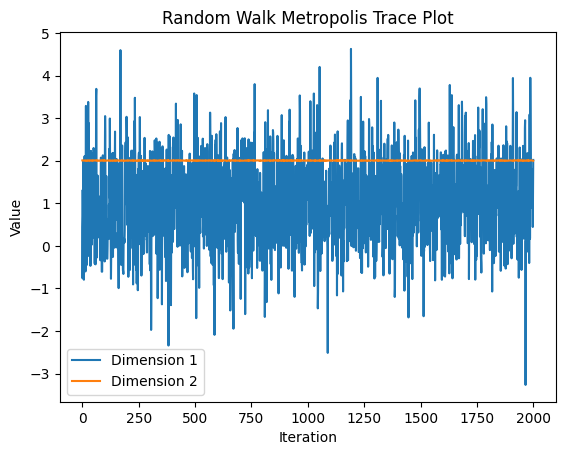

In [14]:
for i in range(chain.shape[1]):
    plt.plot(chain[:, i], label=f"Dimension {i+1}")

# Add labels and legend
plt.title("Random Walk Metropolis Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

# Show the plot
plt.show()

### Independent Metropolis Trace Plot

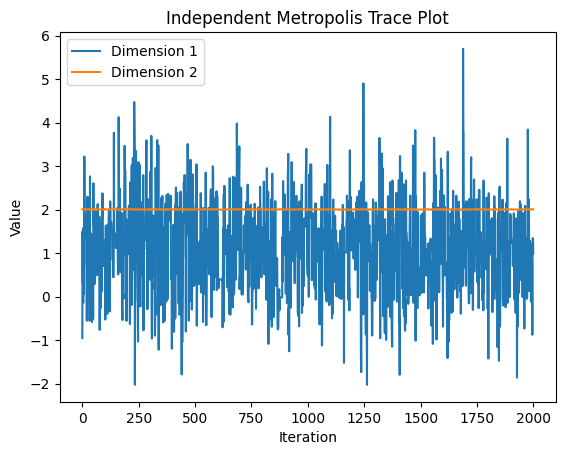

In [15]:
for i in range(ind_chain.shape[1]):
    plt.plot(ind_chain[:, i], label=f"Dimension {i+1}")

# Add labels and legend
plt.title("Independent Metropolis Trace Plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

# Show the plot
plt.show()

### Plot the covariance ellipsoid for Random Walk Metropolis

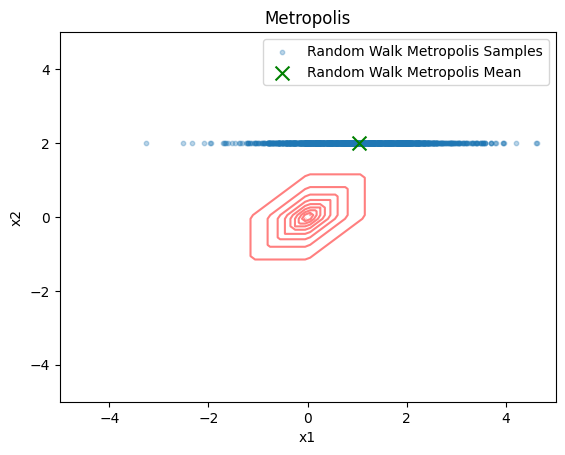

In [16]:
# Define the PDF function
def pdf(x1, x2):
    return np.exp(-np.abs(x1) - np.abs(x2) - np.abs(x1 - x2))

# Generate grid points for x1 and x2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the PDF values for the grid points
Z = pdf(X1, X2)

# Plot the contour of the PDF
plt.contour(X1, X2, Z, levels=10, colors='r', alpha=0.5)

# Plot the samples
plt.scatter(chain[:, 0], chain[:, 1], s=10, alpha=0.3, label='Random Walk Metropolis Samples')

# Plot the mean
plt.scatter(sample_mean[0], sample_mean[1], s=100, marker='x', color='g', label='Random Walk Metropolis Mean')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metropolis')
plt.legend()

plt.show()

### Plot the covariance ellipsoid for Independent Metropolis

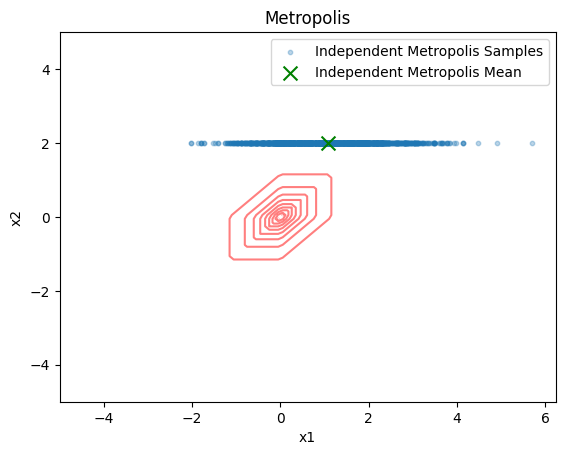

In [17]:
# Define the PDF function
def pdf(x1, x2):
    return np.exp(-np.abs(x1) - np.abs(x2) - np.abs(x1 - x2))

# Generate grid points for x1 and x2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the PDF values for the grid points
Z = pdf(X1, X2)

# Plot the contour of the PDF
plt.contour(X1, X2, Z, levels=10, colors='r', alpha=0.5)

# Plot the samples
plt.scatter(ind_chain[:, 0], ind_chain[:, 1], s=10, alpha=0.3, label='Independent Metropolis Samples')

# Plot the mean
plt.scatter(ind_sample_mean[0], ind_sample_mean[1], s=100, marker='x', color='g', label='Independent Metropolis Mean')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metropolis')
plt.legend()

plt.show()

### Create a QQ-Plot comparing the 2 chains

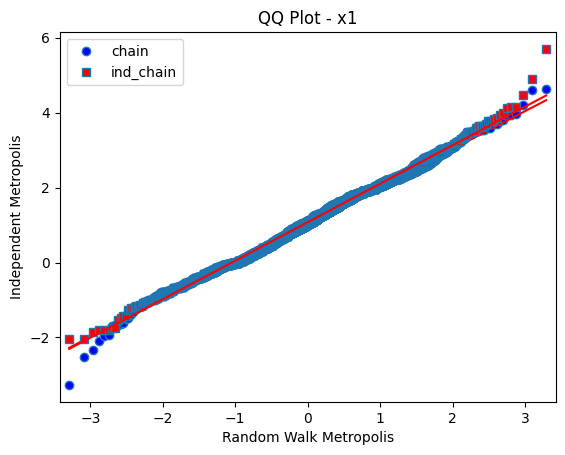

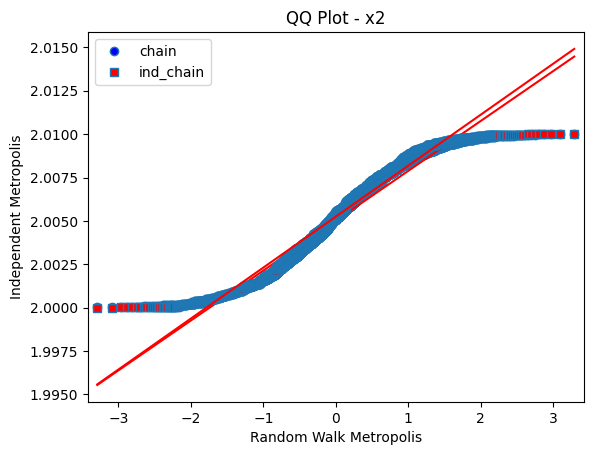

In [18]:
from statsmodels.graphics.gofplots import qqplot

# Select the first column of chain and ind_chain
chain_col1 = np.sort(chain[:, 0])
ind_chain_col1 = np.sort(ind_chain[:, 0])

# Create QQ plot for the first column with custom colors
fig, ax = plt.subplots()
qqplot(chain_col1, line='s', ax=ax, marker='o', markerfacecolor='blue', markersize=6, label='chain')
qqplot(ind_chain_col1, line='s', ax=ax, marker='s', markerfacecolor='red', markersize=6, label='ind_chain')
ax.set_title('QQ Plot - x1')
ax.set_xlabel('Random Walk Metropolis')
ax.set_ylabel('Independent Metropolis')
ax.legend()
plt.show()

# Select the second column of chain and ind_chain
chain_col2 = chain[:, 1]
ind_chain_col2 = ind_chain[:, 1]

# Create QQ plot for the second column with custom colors
fig, ax = plt.subplots()
qqplot(chain_col2, line='s', ax=ax, marker='o', markerfacecolor='blue', markersize=6, label='chain')
qqplot(ind_chain_col2, line='s', ax=ax, marker='s', markerfacecolor='red', markersize=6, label='ind_chain')
ax.set_title('QQ Plot - x2')
ax.set_xlabel('Random Walk Metropolis')
ax.set_ylabel('Independent Metropolis')
ax.legend()
plt.show()

### Effective Sample Size for Random Walk Metropolis

In [19]:
import tensorflow_probability as tfp
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
ess = tfp.mcmc.effective_sample_size(chain)[0]

print(int(ess.numpy()))

# 1344

C:\Users\Platon\PycharmProjects\Gibbs\venv\lib\site-packages\tensorflow_probability\python\__init__.py:70: UserWarning: TensorFloat-32 matmul/conv are enabled for NVIDIA Ampere+ GPUs. The resulting loss of precision may hinder MCMC convergence. To turn off, run `tf.config.experimental.enable_tensor_float_32_execution(False)`. For more detail, see https://github.com/tensorflow/community/pull/287.
  warnings.warn(


1344


### Effective Sample Size for Independent Metropolis

In [20]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
ess = tfp.mcmc.effective_sample_size(ind_chain)[0]

print(int(ess.numpy()))

# 824

759


In [25]:
from tabulate import tabulate

# Your data
data = [["ESS Random Walk Metropolis", "636", "1344"],
        ["ESS Independent Metropolis", "937", "759"]]

# Column names
headers = ['Part 1', 'Part 2']

# Print table with headers
print(tabulate(data, headers=headers))
print("Note that these results are with different thinning and burning for each case")

                              Part 1    Part 2
--------------------------  --------  --------
ESS Random Walk Metropolis       636      1344
ESS Independent Metropolis       937       759
Note that these results are with different thinning and burning for each case
